In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 15

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!unzip 구내식당식수인원.zip -d ./data

Archive:  구내식당식수인원.zip
  inflating: ./data/sample_submission.csv  
  inflating: ./data/test.csv         
  inflating: ./data/train.csv        


In [ ]:
train_raw = pd.read_csv('train.csv', encoding = 'utf-8')
test_raw = pd.read_csv('test.csv', encoding = 'utf-8')
submission = pd.read_csv('sample_submission.csv', encoding = 'utf-8')

In [ ]:
train_raw.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


In [ ]:
test_raw.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지


In [ ]:
# 행렬 값을 확인
print(' train shape: ', train_raw.shape, '\n', 'test shape: ', test_raw.shape)

 train shape:  (1205, 12) 
 test shape:  (50, 10)


In [ ]:
# 칼럼명 수정하기
train = train_raw.copy()
train.columns = ['date', 'dow', 'total_p', 'vacationer', 'business_t', 'night_worker', 'home_worker', 'brk', 'ln', 'dn', 'lunch', 'dinner']
train.head(2)

,date,dow,total_p,vacationer,business_t,night_worker,home_worker,brk,ln,dn,lunch,dinner
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지


In [ ]:
# 날짜를 datetime 형식으로 바꿔서 사용하면 좋다고 한다. 그다음에 요일 정보를 숫자로 만들어줍니다.
def to_datetime(df, date):
    df['date'] = pd.to_datetime(df[date])
    df['dow'] = pd.to_datetime(df[date]).dt.weekday + 1
to_datetime(train, 'date');

In [ ]:
train.head(2)

,date,dow,total_p,vacationer,business_t,night_worker,home_worker,brk,ln,dn,lunch,dinner
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


In [ ]:
test.head(2)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn
0,2021-01-27,3,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,4,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1205 non-null   datetime64[ns]
 1   dow        1205 non-null   int32         
 2   employees  1205 non-null   int64         
 3   dayoff     1205 non-null   int64         
 4   bustrip    1205 non-null   int64         
 5   ovtime     1205 non-null   int64         
 6   remote     1205 non-null   float64       
 7   brk        1205 non-null   object        
 8   ln         1205 non-null   object        
 9   dn         1205 non-null   object        
 10  target_ln  1205 non-null   float64       
 11  target_dn  1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(4), object(3)
memory usage: 108.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       50 non-null     datetime64[ns]
 1   dow        50 non-null     int32         
 2   employees  50 non-null     int64         
 3   dayoff     50 non-null     int64         
 4   bustrip    50 non-null     int64         
 5   ovtime     50 non-null     int64         
 6   remote     50 non-null     float64       
 7   brk        50 non-null     object        
 8   ln         50 non-null     object        
 9   dn         50 non-null     object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(3)
memory usage: 3.8+ KB


# 간단한 시각화

#### 1 점심과 저녁 이용자수를 시각화해보기

In [ ]:
train.head(2)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn,target_ln,target_dn
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


### 히스토그램을 이용해서 예측하고 싶은 target값들을 시각화해보기

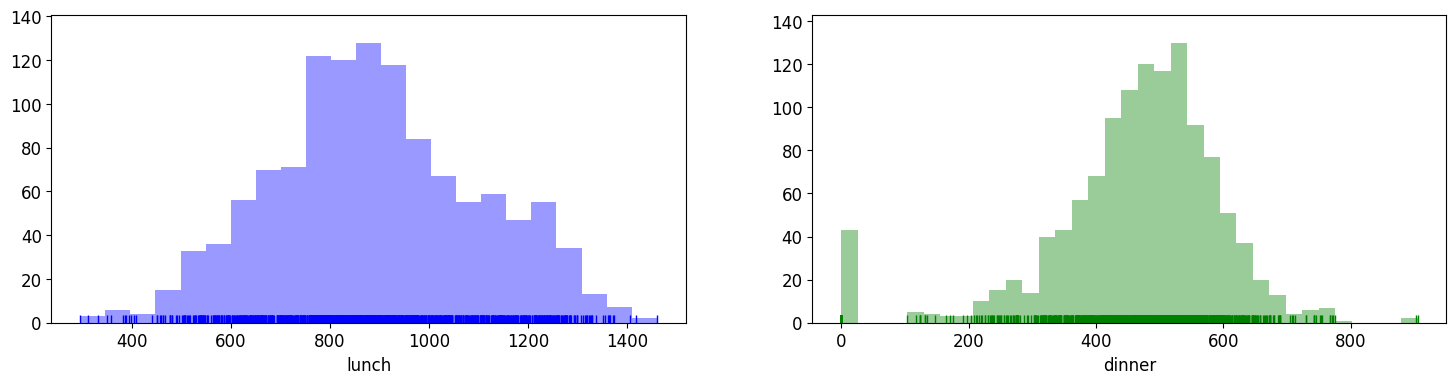

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(train["lunch"], ax = ax[0], color = 'blue', kde = False, rug = True)
sns.distplot(train["dinner"], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

### 히스토그램으로 봤을때는 점심이용자수는 눈에 띄는 특징이 없다.200명에서 1600명까지 넓게 펴짐
### 저녁 이용자수는 특이하게 0인날이 존재한다. (오류인가?) 그리고 이용자수는 몇백명정도의 범위이고 전반적으로 점심보다 저녁 이용자수가 더 적다

### 2 코로나
다음으로 시계열 시각화 해보기  - 시계열로 보는 이유는 코로나 전후 간 차이가 있는지 (식수인원) 확인하려고 한다.

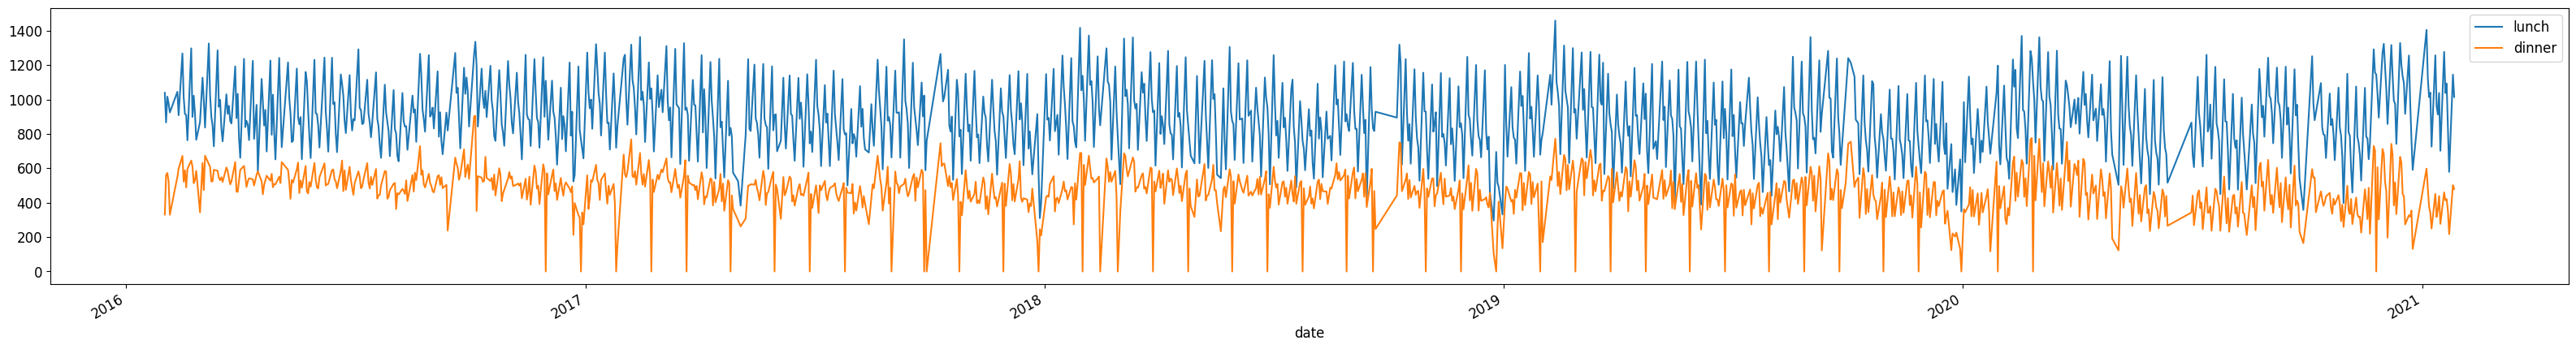

In [ ]:
train.plot(x = 'date', y = ['lunch', 'dinner'], figsize = (40, 5))
plt.show()

## 시각화 결과
 #### 점심의 경우, 이용자 시각화만으로는 별 다른 패턴을 찾기 어렵다

 #### 저녁의 경우는, 특정한날에 이용자수가 0명인 날이 2016년말 2020년 초반까지 보인다. 아까 히스토그램에서도 보이는 특징이다.
 오류인지 컴토해봐야한다.
 #### 코로나로 인한 점심 저녁 이용자수가 줄어들것이라 예상했지만 에상과 달리 전후 간 차이는 별로 없다
 #### 또한 2020년초이후 0명이 되는날이 거의 없다는 점이다.


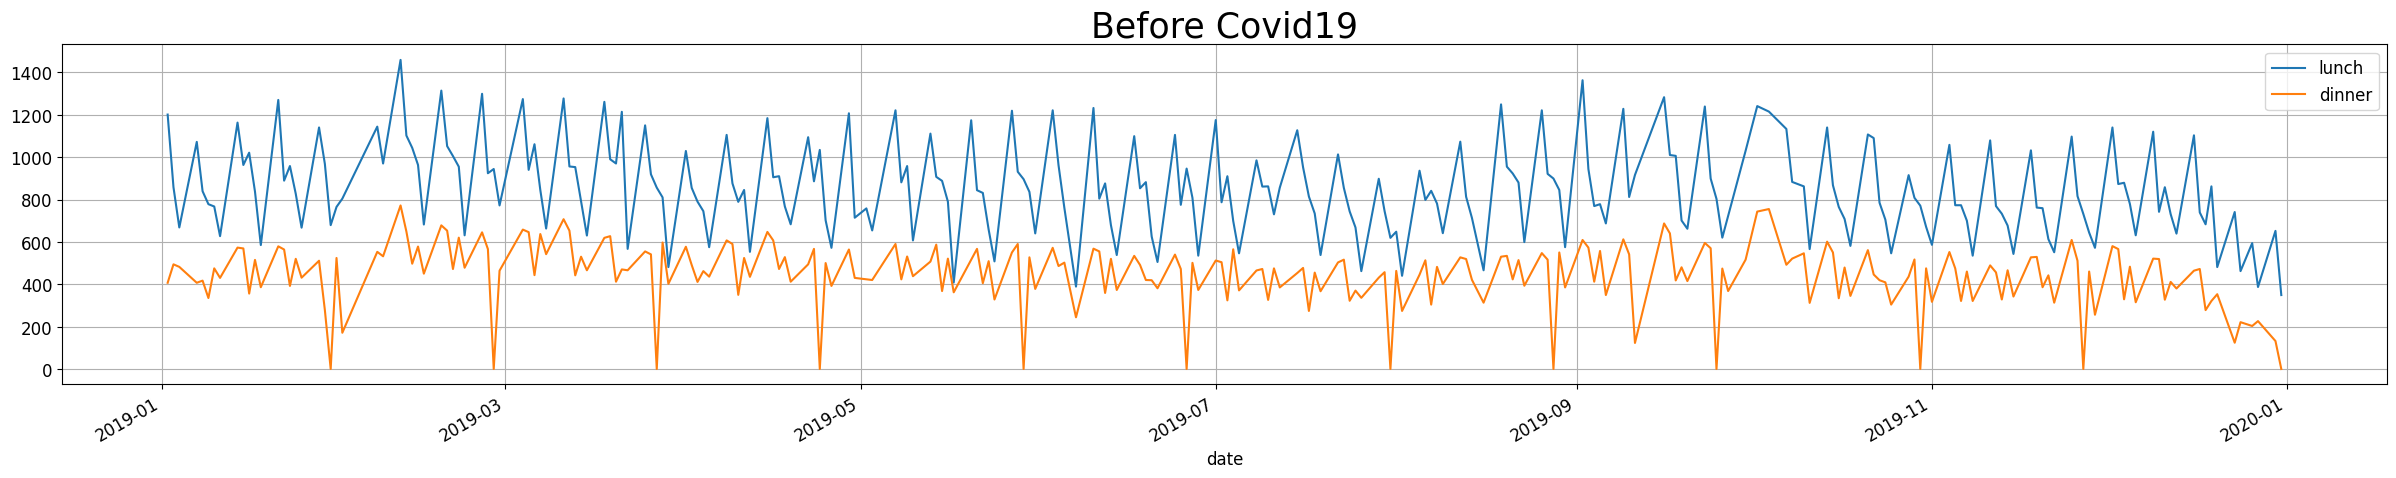

In [ ]:
before_covid = train[train['date'].dt.year == 2019][['date', 'lunch', 'dinner']]
before_covid.plot(x = 'date', y = ['lunch', 'dinner'], figsize = (30, 5), grid = True)
plt.title('Before Covid19', fontsize = 25)
plt.show()

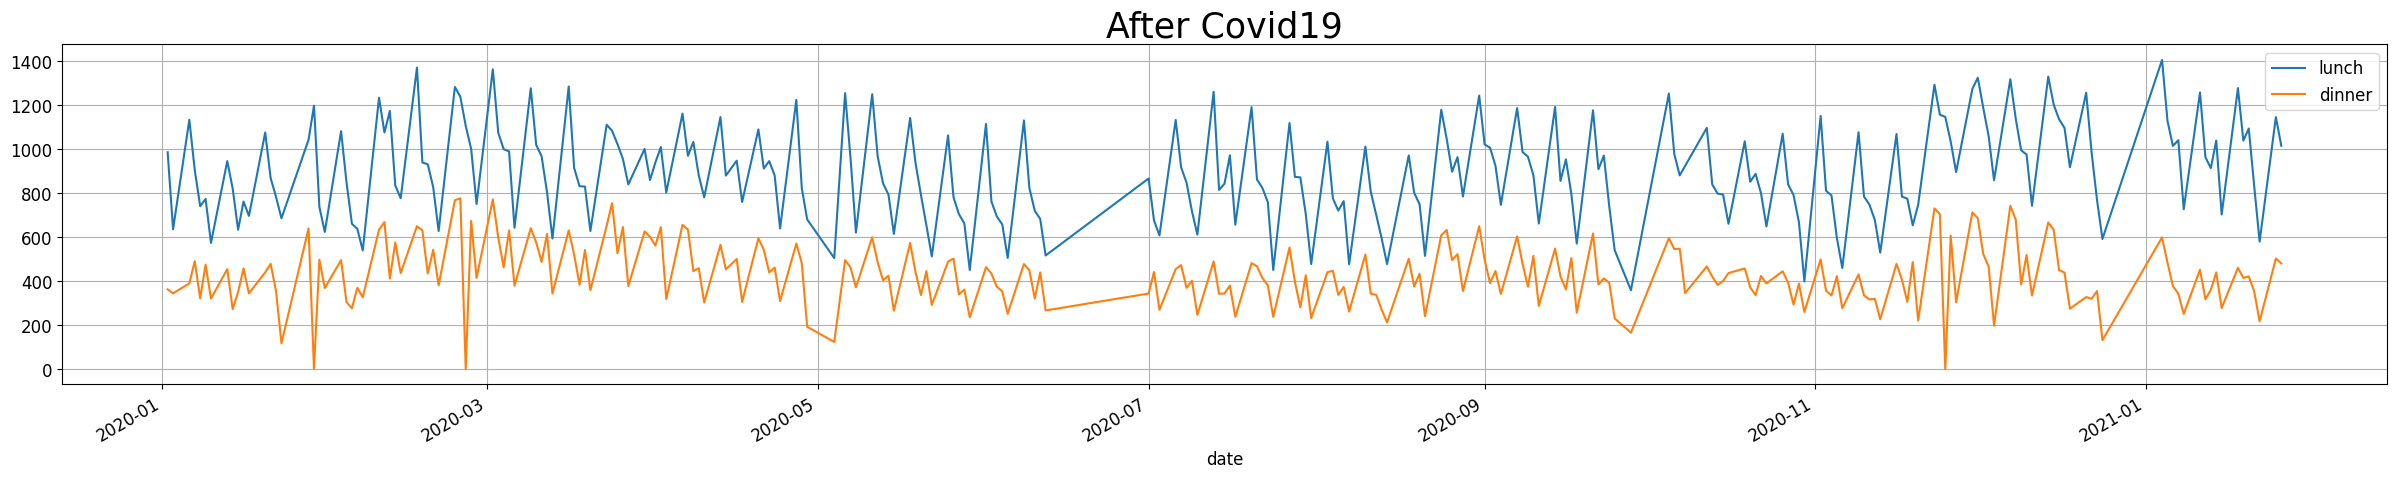

In [ ]:
after_covid = train[train['date'].dt.year >= 2020][['date', 'lunch', 'dinner']]
after_covid.plot(x = 'date', y = ['lunch', 'dinner'], figsize = (30, 5), grid = True)
plt.title('After Covid19', fontsize = 25)
plt.show()

코로나 전후 점심과저녁이용자수 평균

In [ ]:
print('점심:', '2019년에는', round(before_covid.lunch.mean(), 2), ', 2020년에는', round(after_covid.lunch.mean(), 2))
print('저녁:', '2019년에는', round(before_covid.dinner.mean(), 2), ', 2020년에는', round(after_covid.dinner.mean(), 2))

점심: 2019년에는 850.51 , 2020년에는 890.97
저녁: 2019년에는 445.39 , 2020년에는 428.34


평균 차이가 그렇게 안난다 오히려 점심식사는 2020년도가 더 많다고 판단한다
코로나는 2020년도부터 시작하였다.
이러면 2020년동안 총 직원수가 늘어나서 그런건지 확인해보면

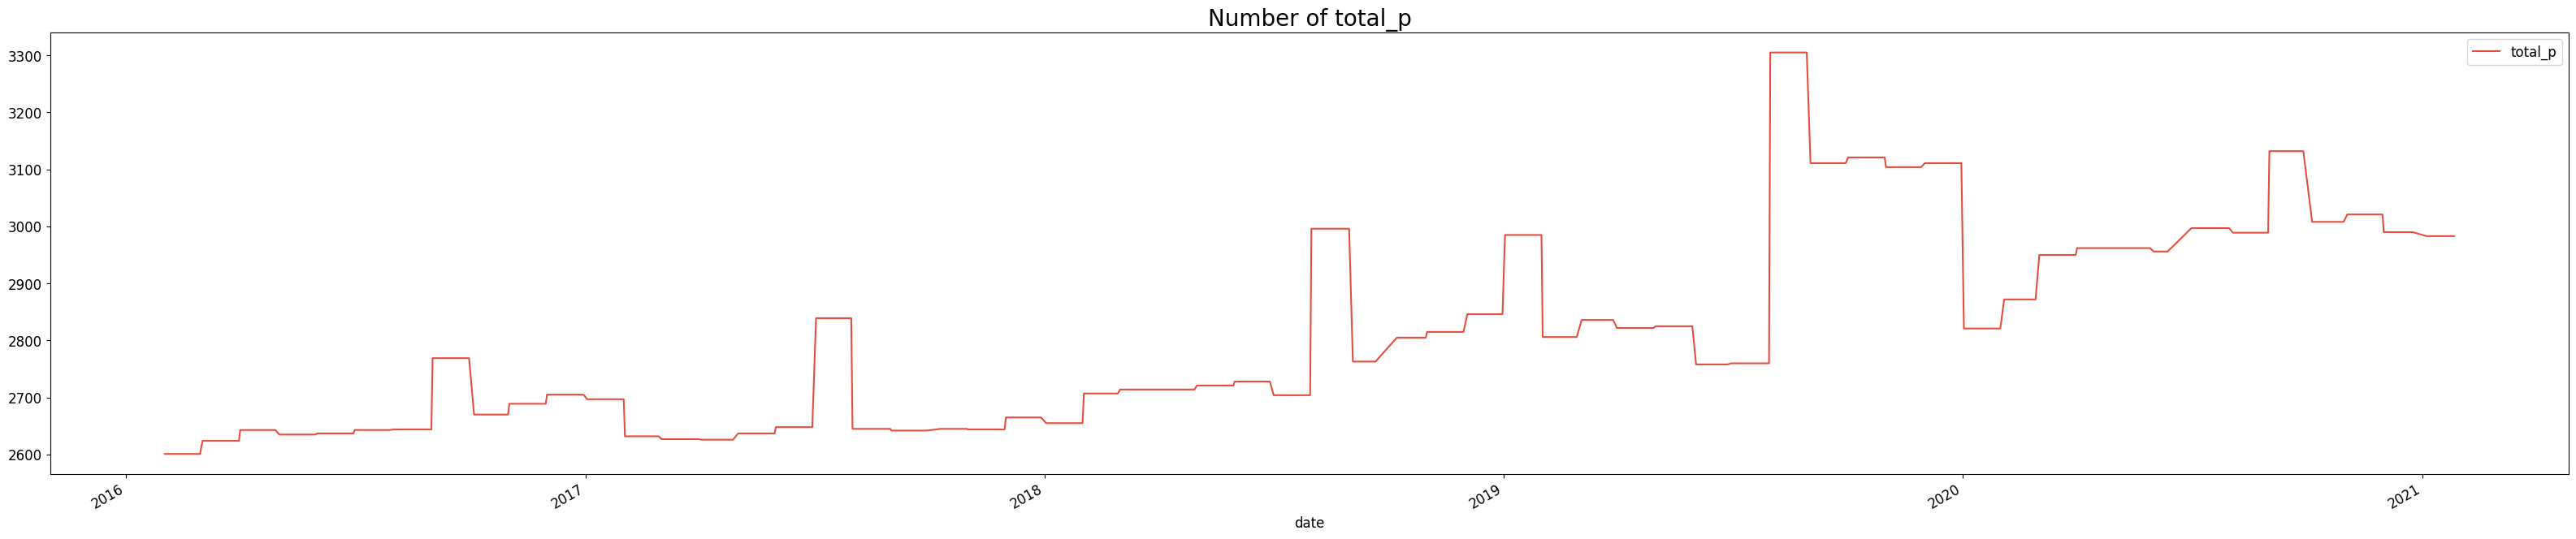

In [ ]:
train.plot(x = 'date', y = 'total_p', figsize = (40, 8), c = "#e74c3c")
plt.title("Number of total_p", fontsize = 20)
plt.show()

정원수는 증가하는 양상을 보이긴 하지만 2019와 2020만을 비교하면 딱히 정원수가 더 많다고는 할수없다
2019하반기에 급증한 때가 있기 떄문이다.

이전에 저녁 이용자수를 확인했을 때, 0명인 날들이 있었습니다. 이게 오류인건지, 아니면 어떤 이유가 있어서인지 확인해보겠습니다.




In [ ]:
train[train.target_dn == 0][['date',  'dayoff', 'bustrip', 'ovtime', 'remote', 'dow', 'dn', 'dinner']]

,date,dayoff,bustrip,ovtime,remote,dow,dn,target_dn
204,2016-11-30,68,207,0,0.0,3,*,0.0
224,2016-12-28,166,225,0,0.0,3,*,0.0
244,2017-01-25,79,203,0,0.0,3,*,0.0
262,2017-02-22,75,252,0,0.0,3,*,0.0
281,2017-03-22,53,235,0,0.0,3,*,0.0
306,2017-04-26,45,304,0,0.0,3,*,0.0
327,2017-05-31,43,265,0,0.0,3,자기계발의날,0.0
346,2017-06-28,58,259,0,0.0,3,*자기계발의날*,0.0
366,2017-07-26,254,246,0,0.0,3,가정의날,0.0
392,2017-09-01,177,303,45,0.0,5,*,0.0


녁 이용자가 0명이었던 이유

월별 마지막 (또는 그 전 주) 수요일(dow가 3인 날)은 '자기개발의 날'이라서 모두 정시 퇴근을 하는 (해야하는) 날인가 봅니다. 아예 저녁 메뉴가 빈 칸인 것을 보면 말이죠.
저녁 메뉴가 제공됨에도 불구하고 저녁 이용자가 0명인 날이 딱 2일 있습니다. 2017-09-27와 2018-02-14 입니다. 이 날들은 긴 공휴일 전후의 날짜일까 싶어 확인해보았습니다.
예전 달력을 확인해보니, 2017-09-27은 공휴일 직전은 아니었지만, 2017년의 유명한 황금연휴 전 주였습니다. 개천절, 추석, 대체휴일, 한글날까지 황금연휴였지요.
2018-02-14은 예상대로 2018-02-15 ~ 17일까지의 설날 연휴 전날이었습니다.

# 변수간의 상관관계 분석

In [ ]:
train.head(2)

,date,dow,total_p,vacationer,business_t,night_worker,home_worker,brk,ln,dn,lunch,dinner
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


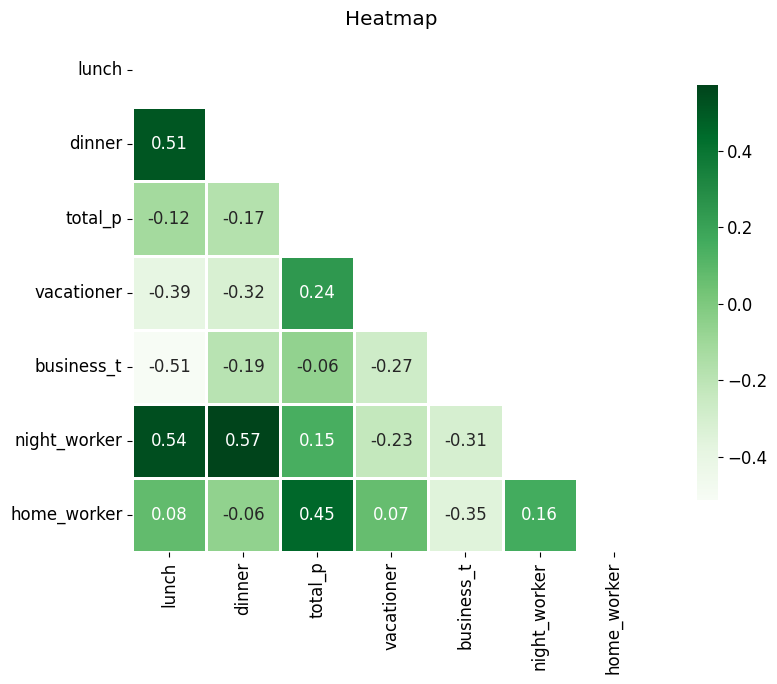

In [ ]:
df = train[['lunch', 'dinner', 'total_p', 'vacationer', 'business_t', 'night_worker', 'home_worker']]
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.rcParams['font.size'] = 12  # 폰트 크기를 약간 줄임

fig, ax = plt.subplots(figsize=(10, 7))  # 차트 크기를 조정
sns.heatmap(df.corr(), mask=mask, annot=True, fmt=".2f", linewidths=2, cmap='Greens',
            cbar_kws={'shrink': .8}, square=True, ax=ax)
plt.title('Heatmap')
plt.tight_layout()  # 여백을 조정하여 레이아웃을 더욱 깔끔하게
plt.show()


### 예측하고 싶은 변수(종속변수)는 점심과 저녁 이용자수이다. 다시 말해 target_ln,target_dn이다.
### 일반적으로 상관관계의 크기가 0.4이상이면 상관성이 있다고 볼수있다.

- - 점심을 보게되면 target_ln에 해당하는 열을 보면 상관관계가 가장높은것은 ovtime이다. 시간외근무자수 다음으로 bustrip 출장자수가이다.
- - 물론, 시간외근무자수는 양의 관계과 출장자수는 음의 관계이다. 각각 회사 내에 직원이 많이 있느냐 적게 있느냐 영향을 끼치는 요인이다.
- - 특이한것은, 시간외근무자라는 것은 야근을 한다는 것인데 저녁뿐만아니라 점심 이용자수와도 상관관계를 보인다는 점이다.
- - dayoff는 휴가자수인데 또한 출장자수와 비슷하게 그값이 크면 출근한 직원수가 적다는 의미이므로 음의 관계를 갖고 있다.

#### 저녁을 보자
- - 사실 점심떄와 크게 다르지는 않는다. 차이가 있다면 애초에 회사 내에 없었던 직원들의 수와의 상관관계가 점심떄보다는 약해졌다.
- - 중요한 사실은 시간외 근무자수의 상관계수가 0.57로 더 커지게 되었다.
- - 예측하기 쉬웠던 이유는 야근하는사람이 많아지면 저녁 이용자수가 많아질것으로 생각이 된다.

### 선점도로 그려보겠다.

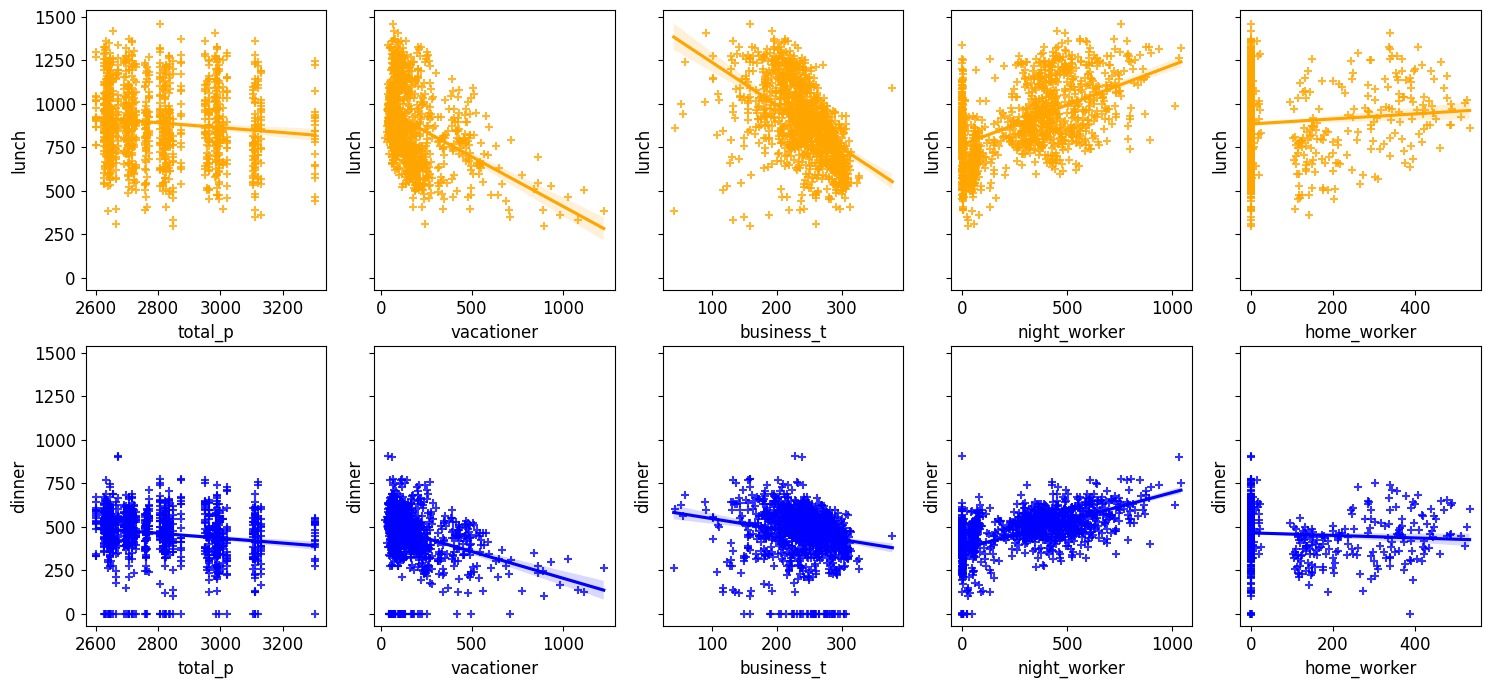

In [ ]:
fig, ax = plt.subplots(figsize = (18, 8), ncols = 5, nrows = 2, sharey=True)
plt.rcParams['font.size'] = 12
sns.color_palette("Paired")
train_features = [ 'total_p', 'vacationer', 'business_t', 'night_worker', 'home_worker',  'total_p', 'vacationer', 'business_t', 'night_worker', 'home_worker']
for i, feature in enumerate(train_features):
    row = int(i/5)
    col = i%5
    if i < 5:
        sns.regplot(x=feature, y = 'lunch', data = train, ax = ax[row][col], color = 'orange', marker = '+')
    else:
        sns.regplot(x=feature, y = 'dinner', data = train, ax = ax[row][col], color = 'blue', marker = '+')

히트맵이든 산점도로 그리든 결과는 같다고 보면된다.

# 월별 & 요일별 패턴
위에서는 변수간 상관관계를 보았는데 월별 요일별 점심 저녁 이용자수의 패턴을 한번 파악해보자

월별로 점심과 저녁 이용자수가 다를 것 같습니다. 일이 많고 바쁜 달에는 밖에서 먹기보다는 회사 구내식당에서 끼니를 해결할 것 같기 때문이죠. 야근도 더 많이 할 것 같고요.
요일에 따라서도 점심과 저녁 이용자수가 달라질 것 같습니다. 예를 들어, 저라면 금요일 저녁은 회사에서 먹기보다는 가족과 함께 집에서 먹고 싶기 때문이죠. 반대로 월요일은 보통 일이 많은 날이니, 구내식당에서 자주 먹을 것 같습니다.

In [ ]:
train.head(3)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn,target_ln,target_dn
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


히트맵을 이용하여 월별 & 요일별 점심과 저녁 이용자수의 평균을 시각화해보겠다.

In [ ]:
tmp = train[['date', 'dow', 'total_p', 'vacationer', 'business_t', 'night_worker', 'home_worker', 'lunch', 'dinner']]
tmp['month'] = tmp['date'].dt.strftime("%m")  # Extract month as string

# Calculate mean lunch target by day of the week and month, then pivot
tmp_ln = tmp.groupby(['dow', 'month'])['lunch'].mean().reset_index().pivot(index='dow', columns='month', values='lunch')

# Calculate mean dinner target by day of the week and month, then pivot
tmp_dn = tmp.groupby(['dow', 'month'])['dinner'].mean().reset_index().pivot(index='dow', columns='month', values='dinner')


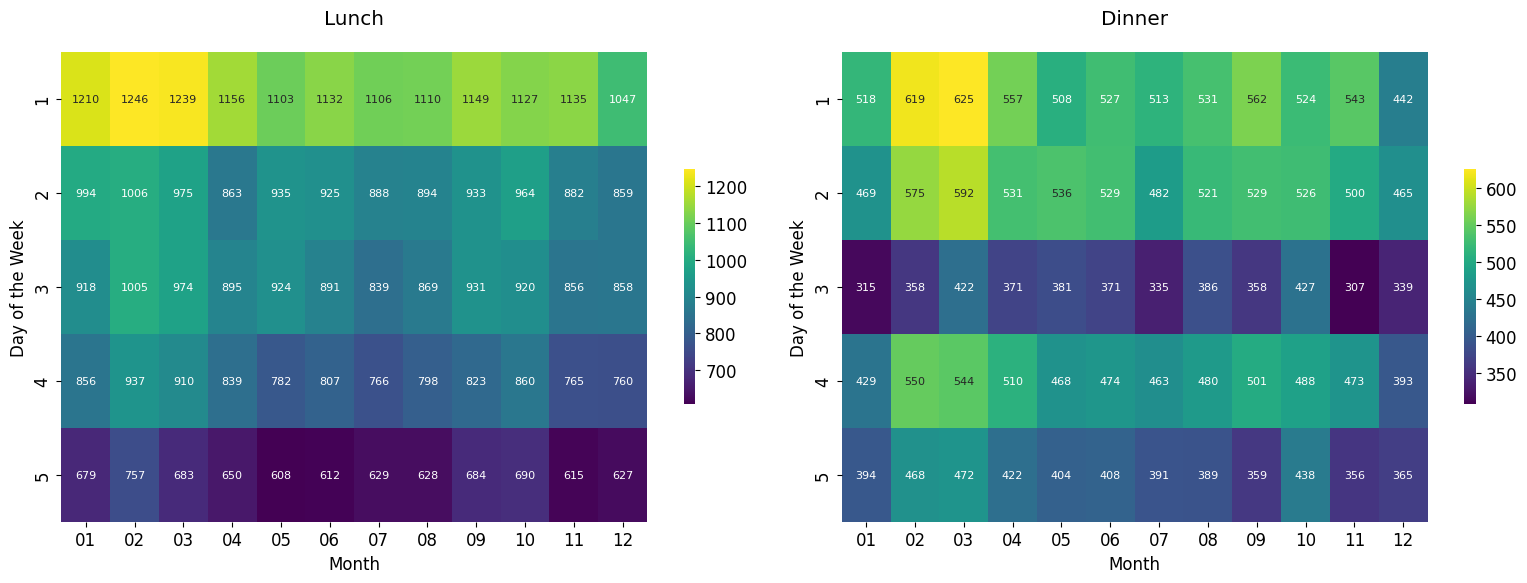

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))  # 차트 크기 조정

# 점심 데이터 히트맵
sns.heatmap(tmp_ln, cmap='viridis', annot=True, fmt=".0f", annot_kws={'size': 8}, linewidths=0, cbar_kws={"shrink": 0.5}, ax=ax[0])
ax[0].set_title('Lunch', pad=20)
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Day of the Week')

# 저녁 데이터 히트맵
sns.heatmap(tmp_dn, cmap='viridis', annot=True, fmt=".0f", annot_kws={'size': 8}, linewidths=0, cbar_kws={"shrink": 0.5}, ax=ax[1])
ax[1].set_title('Dinner', pad=20)
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Day of the Week')

plt.tight_layout()  # 여백과 레이아웃 조정
plt.show()


# 점심
- 1~5가 순서대로 월부터 금이다.
- 월욜날이 분포도로 보았을때 압도적으로 빨간색이 분포되어 늘 1000명보다 많다는 뜻을 의미한다.
- 다른 요일에 비해 월욜날에 점심 이용자수가 많은 것은 1년 내내 보여진다.
- 그렇지만 같은 월욜날이라도 2,3월달에 이용자수가 더 많다
- 화수는 대략 1000명 정도의 이용자수가 있는 달이 있는데 역시 2,3월이다.
- 2,3월이 일이 몰려있다고 할수있거나 아니면 적응하는시기가 새로운 신입이나 새해 친목을 하기 위해 구내식당에서 많은 사람들이 먹을수있다고 생각한다.
하지만 일이 많으면 구내식당에서 점심을 먹는다는 가설이 성립해야만 가능하고 새로운신입이나 친목을 2,3월에 하는 특성을 가지고 있다는 가설이 성립해야한다.
- 목요일과 금요일은 점심이용자수가 적다. 금요일은 거의 짙은 초록색이다. 직원들은 금요에는 저녁뿐만아니라 점심도 회사내에서 먹지않다고 파악할수있다.
또 다른 이유는 출장수인데 이후에 확인해보겠다.
# 저녁
- 저녁 이용자수의 전체 인원은 점심 이용자수보다 절반정도 적다는 것을 알아야한다.
- 점심과 마찬가지로 월욜날이 가장 많이 저녁밥을 구내식당안에서 먹게 되고
- 점심과 다르게 화욜에도 비슷한수준으로 이용자수가 많다. - 월화에 야근하는 직원들이 많다고 생각된다.(조금있다가 시간외 근로자수를 적용해볼것이다)
- 그리고 예상외로 수요일에 저녁 이용자수가 매우적은데 아까 0으로 도배되는 이벤트들이 자기 개발의 날 때문이겠다고 생각할수있다.
저녁메뉴가 없는 데이터는 삭제한뒤 다시 저녁 히트맵을 시각화해보겠다.


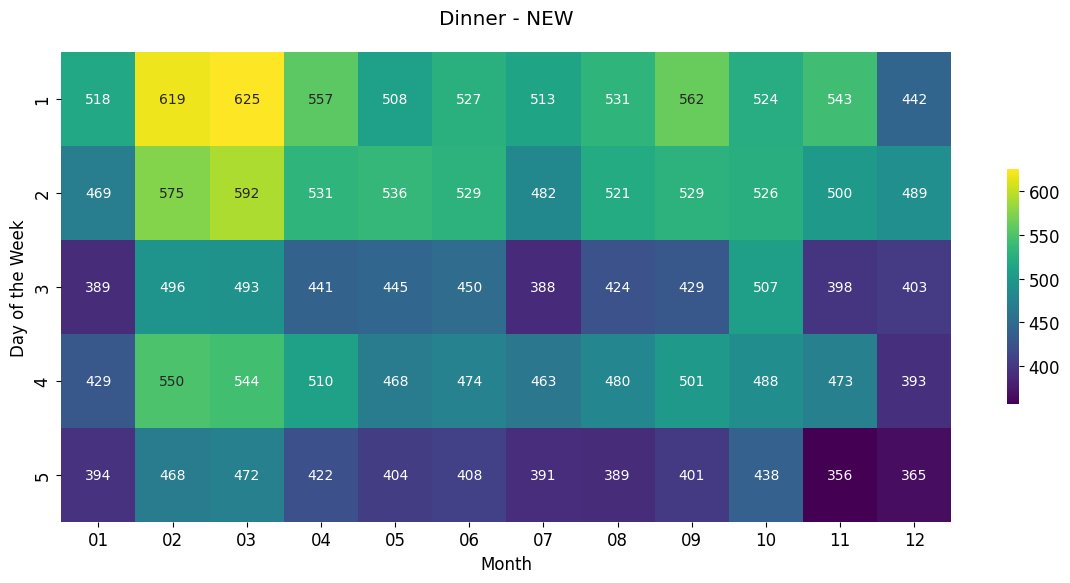

In [ ]:
# Remove rows where dinner target is 0
idx = train[train.dinner == 0].index
tmp = train.drop(idx)

# Extract month as string from the date
tmp['month'] = tmp['date'].dt.strftime("%m")

# Calculate mean dinner target by day of the week and month, then pivot
tmp_dn2 = tmp.groupby(['dow', 'month'])['dinner'].mean().reset_index().pivot(index='dow', columns='month', values='dinner')

# Setup plot
fig, ax = plt.subplots(figsize=(12, 6))  # 차트 크기 조정

# 저녁 데이터 히트맵
sns.heatmap(tmp_dn2, cmap='viridis', annot=True, fmt=".0f", annot_kws={'size': 10}, linewidths=0, cbar_kws={"shrink": 0.5}, ax=ax)
ax.set_title('Dinner - NEW', pad=20)
ax.set_xlabel('Month')
ax.set_ylabel('Day of the Week')

plt.tight_layout()  # 여백과 레이아웃 조정
plt.show()

점심은 동일하고
저녁은 자기 개발의 날을 제외했어도 수요일에는 여전히 저녁이용자수가 적다
월화때 야근을 많이해서 저녁을 먹게 된다는 가정하게 수요일은 회사에서 저녁을 먹기 싫다고 판단할수있겠다.
야근 자체를 안하던지 밖에서 저녁을 먹고싶을것이다.

금요일에도 예상대로 적다.
2월3월에는 야근하는 직원들이 많다고 하면 아까 친목하는 이유보다 일이 많은 이유로 점심이용자수가 많을것으로 예상됩니다.
점심과 저녁 이용자수 모두 대체로 요일별 패턴이 가장 극명하게 보인다. 월별 차이보다 훨씬 더

# 주별 & 요일별 패턴

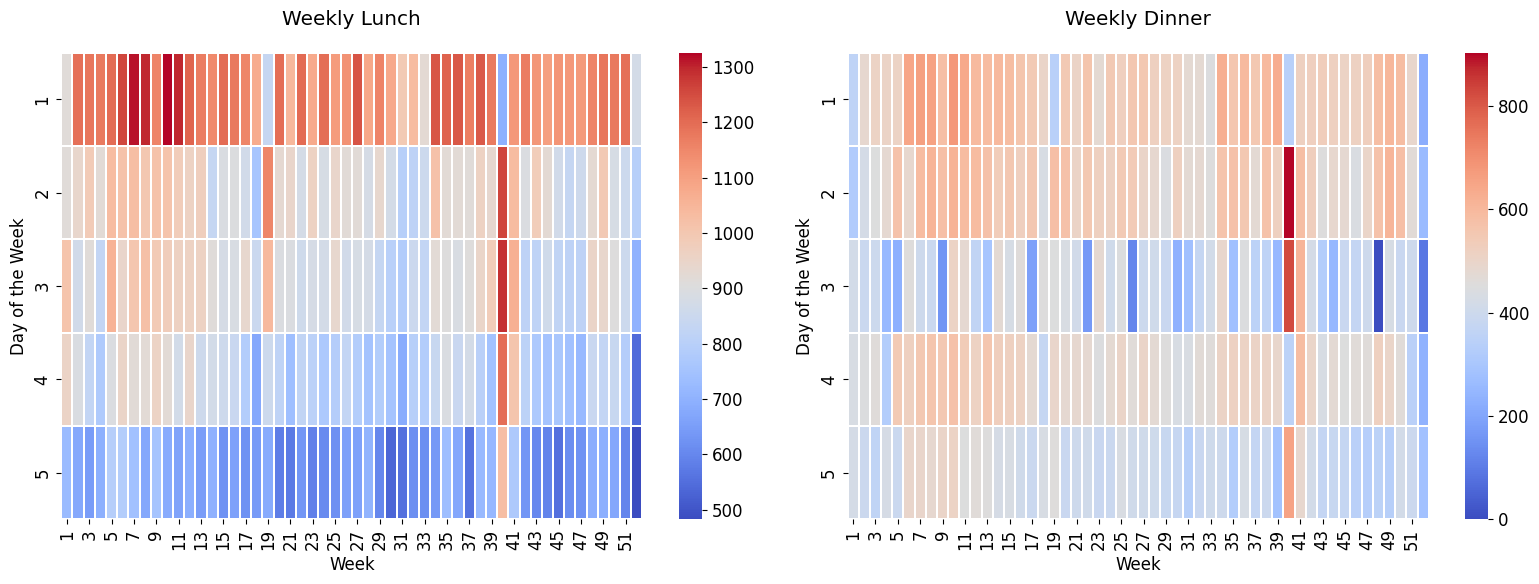

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터에서 'week' 열 추가
train['week'] = train['date'].dt.isocalendar().week

# 주별 요일별로 평균 계산
tmp_ln_week = train.groupby(['dow', 'week'])['lunch'].mean().reset_index().pivot(index='dow', columns='week', values='lunch')
tmp_dn_week = train.groupby(['dow', 'week'])['dinner'].mean().reset_index().pivot(index='dow', columns='week', values='dinner')

# 데이터가 이미 준비되어 있다고 가정
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 점심 데이터 히트맵 (주별 요일별) - 주석 제거
sns.heatmap(tmp_ln_week, cmap='coolwarm', linewidths=0.1, ax=ax[0])
ax[0].set_title('Weekly Lunch', pad=20)
ax[0].set_xlabel('Week')
ax[0].set_ylabel('Day of the Week')

# 저녁 데이터 히트맵 (주별 요일별) - 주석 제거
sns.heatmap(tmp_dn_week, cmap='coolwarm', linewidths=0.1, ax=ax[1])
ax[1].set_title('Weekly Dinner', pad=20)
ax[1].set_xlabel('Week')
ax[1].set_ylabel('Day of the Week')

plt.tight_layout()  # 여백과 레이아웃 조정
plt.show()


주별로 확인했을때

점심 데이터의 변동성:

점심 데이터에서는 인원수가 주별로 크게 변동하는 것을 볼 수 있습니다. 특히 일부 주에서는 인원 수가 매우 높게 나타나며(빨간색 영역), 다른 주에서는 상대적으로 낮습니다(녹색 영역).
일부 주(예: 1, 7, 25, 34, 43, 52주 등)에서 높은 인원 수를 보이는 것은 특정 사건이나 계절적 요인에 의해 영향을 받을 수 있습니다.
저녁 데이터의 일관성과 예외:

저녁 데이터는 상대적으로 점심 데이터보다 변동성이 적은 것을 볼 수 있으며, 대체로 인원 수가 안정적인 편입니다. 그러나 특정 주(예: 22주)에서 저녁 인원 수가 매우 낮은 것을 볼 수 있습니다(붉은색 세로줄). 이는 특별한 사건이 있었음을 나타낼 수 있습니다.
요일별 차이:

요일별로 보면, 특정 요일에 인원 수가 높거나 낮은 경향이 일관되게 나타나는지 분석할 수 있습니다. 예를 들어, 일부 요일에는 다른 요일보다 일관되게 높거나 낮은 인원 수를 보이는지 확인할 수 있습니다.
보통 월요일(1)과 금요일(5)에는 다른 요일에 비해 인원 변동이 더 클 수 있으며, 이는 주말과 연관된 행사나 정책 때문일 수 있습니다.



# 회사에 있는 직원 수
 이번에는 요일&월별로 회사 내에 있는 직원수가 얼마나 다른지 확인해보겠다
 잠재적으로 점심과 저녁을 먹을 사람들이라고 보면된다.
 회사내에 직원수는 본사정원수 - (본사휴가자수 + 본사출장자수 + 재택근무자수)구할수있다.
 이를 구하기전에 휴가자수,출장자수,시간외근무자수,재택근무자수를 요일별&월별로 시각화해보ㅓ겠다.
 다만 재택근무수를 확인해보니 2019년까지는 0명이였다. 재택근무자수는 2020년의 데이터만 시각화하겠다.


In [ ]:
before = train['date'].dt.year < 2020
after = train['date'].dt.year >= 2020

train[before]['home_worker'].value_counts()  # 코로나19 전 재택근무자수

home_worker
0.0    956
Name: count, dtype: int64

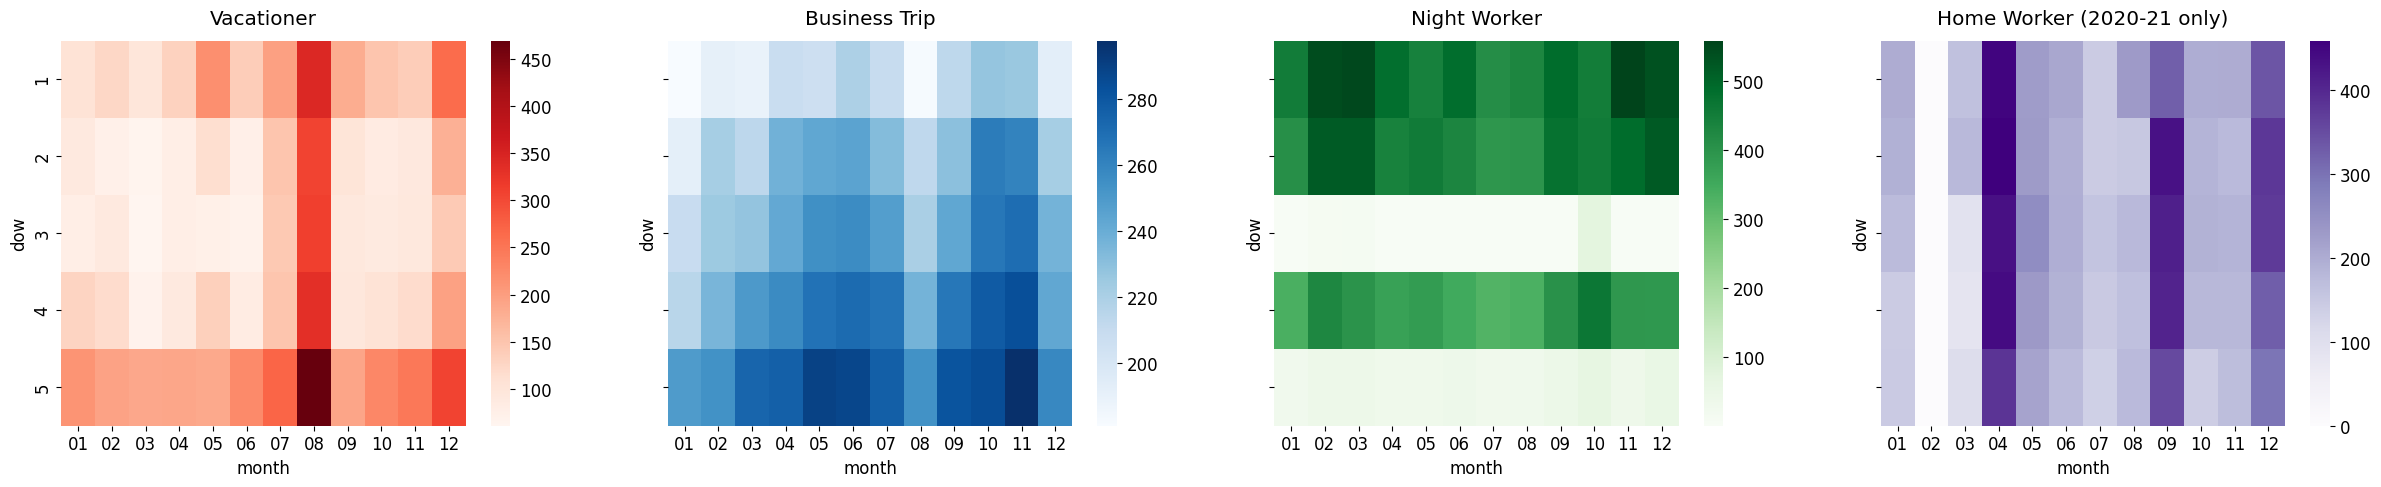

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def heatmap_viz(df):
    df['month'] = df['date'].dt.strftime("%m")  # 월 추출
    after = df['date'].dt.year >= 2020

    # 각 범주별 평균 계산 후 피벗
    tmp_dayoff = df.groupby(['dow', 'month'])['vacationer'].mean().reset_index().pivot(index='dow', columns='month', values='vacationer')
    tmp_bustrip = df.groupby(['dow', 'month'])['business_t'].mean().reset_index().pivot(index='dow', columns='month', values='business_t')
    tmp_ovtime = df.groupby(['dow', 'month'])['night_worker'].mean().reset_index().pivot(index='dow', columns='month', values='night_worker')
    tmp_remote_after = df[after].groupby(['dow', 'month'])['home_worker'].mean().reset_index().pivot(index='dow', columns='month', values='home_worker')

    # 히트맵 그리기
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30, 5), sharey=True)

    sns.heatmap(tmp_dayoff, cmap='Reds', ax=ax[0])  # 색상 변경
    ax[0].set_title('Vacationer', pad=12)
    sns.heatmap(tmp_bustrip, cmap='Blues', ax=ax[1])  # 색상 변경
    ax[1].set_title('Business Trip', pad=12)
    sns.heatmap(tmp_ovtime, cmap='Greens', ax=ax[2])  # 색상 변경
    ax[2].set_title('Night Worker', pad=12)
    sns.heatmap(tmp_remote_after, cmap='Purples', ax=ax[3])  # 색상 변경
    ax[3].set_title('Home Worker (2020-21 only)', pad=12)

    plt.show()

# 가정된 DataFrame 형태
df = train[['date', 'dow', 'vacationer', 'business_t', 'night_worker', 'home_worker']]
heatmap_viz(df)


휴가자수, 출장자수, 시간외근무자수, 재택근무자수는 확연히 다른 패턴을 보입니다. 상대적으로 그 인원수가 많은 요일 and/or 월은 다음과 같습니다.

휴가자수 (Dayoff): 월/금, 7/8/12월
출장자수 (Business Trip) : 금, 5/6/9/10/11월
점심 이용자수가 금요일에 매우 적었던 것을 보면, 당연한 결과입니다. 출장을 한다는 것은 하루종일 회사 내에 없는 것이니까요.
시간외근무자수 (Overtime) : 월/화/목, 2/3월
저녁 이용자수가 수, 금요일에 적은 편인 것을 생각해보면, 자연스러운 결과입니다.
재택근무자수 (Remote) : 4/9/12월


그뒤에 직원수를 계산한뒤 이를 위와같은방법으로 시각화해보겠다.
회사 내에 있는 직원수 = employees - (dayoff + bustrip + remote)

In [ ]:
df = train[['date', 'dow', 'total_p', 'vacationer', 'business_t', 'night_worker', 'home_worker', 'lunch', 'dinner']]
df['in_person'] = df['total_p'] - (df['vacationer'] + df['business_t'] + df['home_worker'])
df['month'] = df['date'].dt.strftime("%m")
df.head(3)

,date,dow,total_p,vacationer,business_t,night_worker,home_worker,lunch,dinner,in_person,month
0,2016-02-01,1,2601,50,150,238,0.0,1039.0,331.0,2401.0,02
1,2016-02-02,2,2601,50,173,319,0.0,867.0,560.0,2378.0,02
2,2016-02-03,3,2601,56,180,111,0.0,1017.0,573.0,2365.0,02


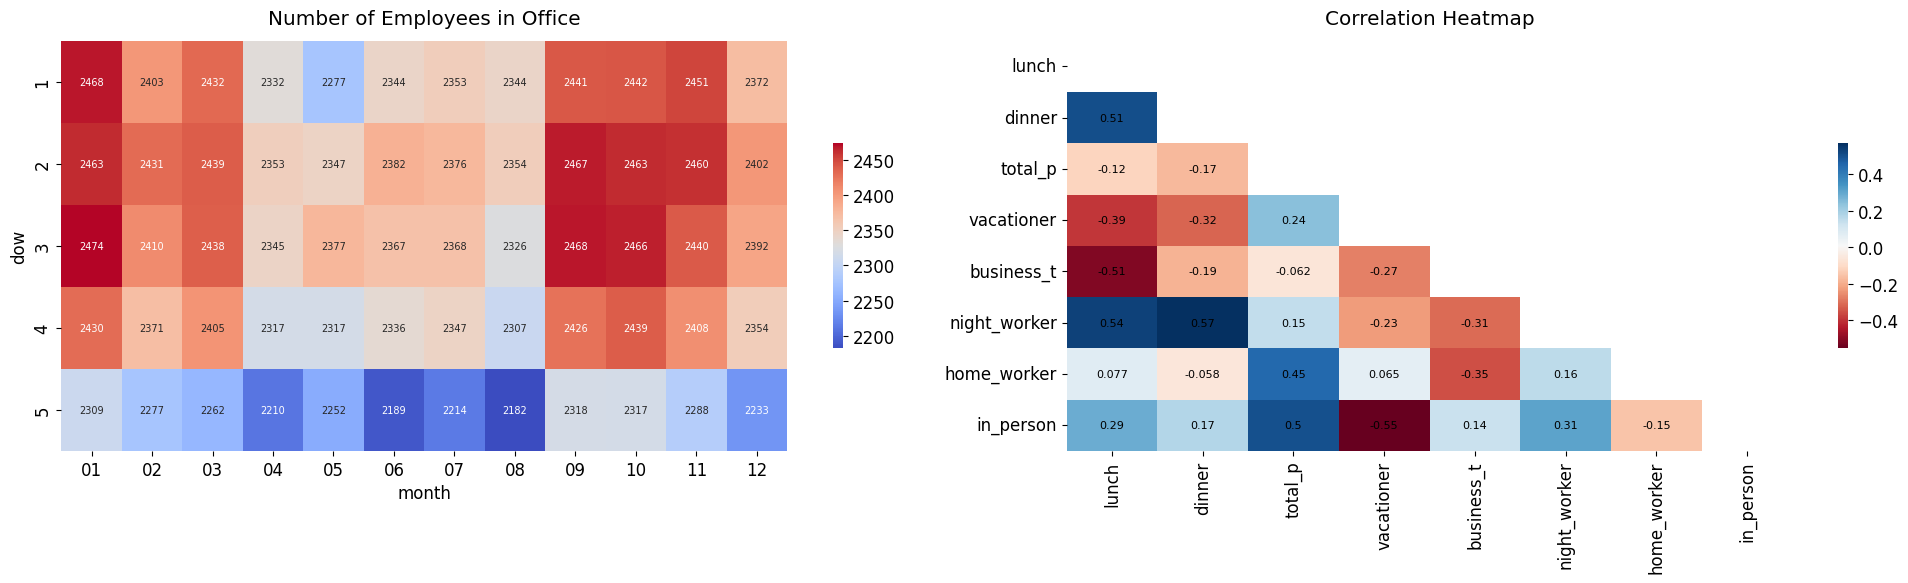

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 그리기 함수
def improved_heatmap_viz(df):
    df['month'] = df['date'].dt.strftime("%m")
    tmp = df.groupby(['dow', 'month'])['in_person'].mean().reset_index().pivot(index='dow', columns='month', values='in_person')

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

    sns.heatmap(tmp, cmap='coolwarm', annot=True, fmt=".0f", annot_kws={'size': 7}, cbar_kws={"shrink": 0.5}, ax=ax[0])
    ax[0].set_title('Number of Employees in Office', pad=12)

    df_corr = df[['lunch', 'dinner', 'total_p', 'vacationer', 'business_t', 'night_worker', 'home_worker', 'in_person']]
    mask = np.triu(np.ones_like(df_corr.corr(), dtype=bool))
    sns.heatmap(df_corr.corr(), annot=True, cmap="RdBu", mask=mask, annot_kws={'size': 8, 'color': 'black'}, cbar_kws={"shrink": 0.5}, ax=ax[1])
    ax[1].set_title('Correlation Heatmap', pad=12)

    plt.tight_layout()
    plt.show()

# 가정된 DataFrame 데이터 사용
improved_heatmap_viz(df)

#회사내 직원수 왼쪽이다.
금요일이 상대적으로 회사내에 직원수가 적다
휴가자수,출장자수가 금요일에 많아서그렇다
월별로 봐도 1-3월, 9-11월이 본사내에 일하는 직원이 제일 많아보인다.
# 상관관계분석
in_office라는 변수를 새롭게 추가해서 상관관계도 새롭게 시각화해보았다.
in_office는 회사 내에 있는 직원수를 의미한다.
점심과 저녁 이용자간상관계수가 순서대로 0.29 , 0.17로 그렇게 강한 상관관계는 아닌듯 하다.


Lunch RMSE: 116.07876254981991
Lunch R^2: 0.6819167861816471
Dinner RMSE: 108.67797049744767
Dinner R^2: 0.40448264488756813


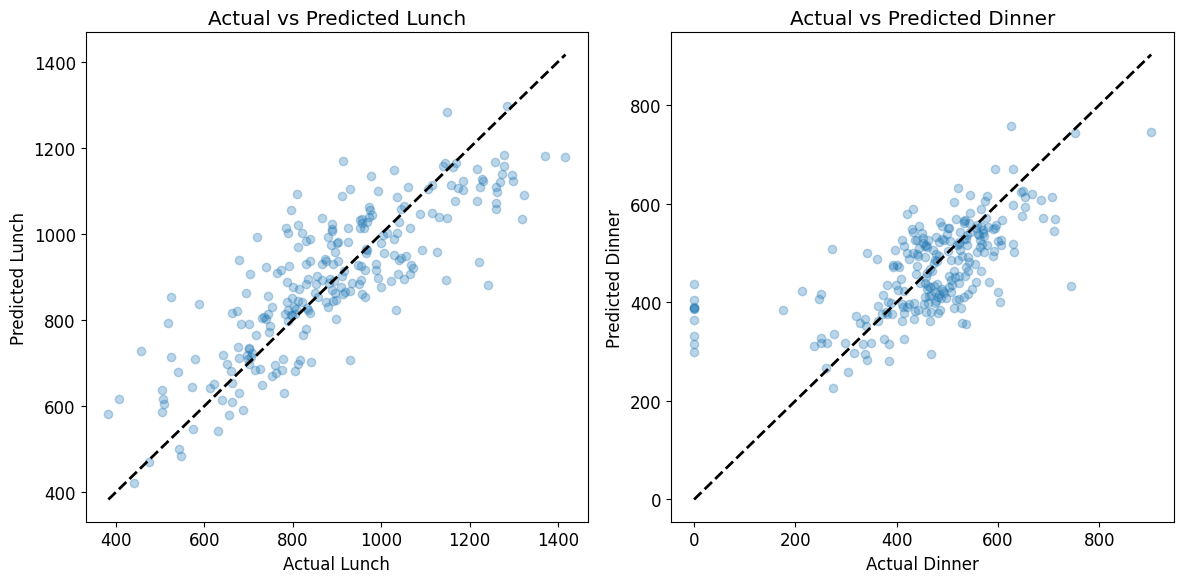

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 및 전처리
# train 데이터프레임이 이미 존재한다고 가정
# 필요한 피처 선택 및 결측치 처리
df = train[['date', 'dow', 'total_p', 'vacationer', 'business_t', 'night_worker', 'home_worker', 'lunch', 'dinner']]
df.dropna(inplace=True)

# 날짜 형식을 datetime으로 변환하고, 월과 요일 정보 추출
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

# 피처와 타겟 설정
features = ['total_p', 'vacationer', 'business_t', 'night_worker', 'home_worker', 'month', 'day_of_week']
target_lunch = 'lunch'
target_dinner = 'dinner'

X = df[features]
y_lunch = df[target_lunch]
y_dinner = df[target_dinner]

# 훈련 및 테스트 데이터 분할
X_train, X_test, y_lunch_train, y_lunch_test = train_test_split(X, y_lunch, test_size=0.2, random_state=42)
X_train, X_test, y_dinner_train, y_dinner_test = train_test_split(X, y_dinner, test_size=0.2, random_state=42)

# 회귀 모델 훈련
lunch_model = LinearRegression()
dinner_model = LinearRegression()

lunch_model.fit(X_train, y_lunch_train)
dinner_model.fit(X_train, y_dinner_train)

# 예측
y_lunch_pred = lunch_model.predict(X_test)
y_dinner_pred = dinner_model.predict(X_test)

# 평가
lunch_rmse = mean_squared_error(y_lunch_test, y_lunch_pred, squared=False)
dinner_rmse = mean_squared_error(y_dinner_test, y_dinner_pred, squared=False)

lunch_r2 = r2_score(y_lunch_test, y_lunch_pred)
dinner_r2 = r2_score(y_dinner_test, y_dinner_pred)

print(f'Lunch RMSE: {lunch_rmse}')
print(f'Lunch R^2: {lunch_r2}')
print(f'Dinner RMSE: {dinner_rmse}')
print(f'Dinner R^2: {dinner_r2}')

# 예측 결과 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_lunch_test, y_lunch_pred, alpha=0.3)
plt.plot([y_lunch_test.min(), y_lunch_test.max()], [y_lunch_test.min(), y_lunch_test.max()], 'k--', lw=2)
plt.xlabel('Actual Lunch')
plt.ylabel('Predicted Lunch')
plt.title('Actual vs Predicted Lunch')

plt.subplot(1, 2, 2)
plt.scatter(y_dinner_test, y_dinner_pred, alpha=0.3)
plt.plot([y_dinner_test.min(), y_dinner_test.max()], [y_dinner_test.min(), y_dinner_test.max()], 'k--', lw=2)
plt.xlabel('Actual Dinner')
plt.ylabel('Predicted Dinner')
plt.title('Actual vs Predicted Dinner')

plt.tight_layout()
plt.show()
